In [197]:
from transformers import pipeline
import pandas as pd
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
import keras
from keras import layers
from keras import optimizers
from keras import ops
import numpy as np
import import_ipynb
import error_function
from keras.callbacks import EarlyStopping
from tqdm import tqdm
from tensorflow.keras.utils import plot_model



In [2]:
sub_dict = { 'astro-ph': 'Astrophysics',
        'astro-ph.CO': 'Cosmology and Nongalactic Astrophysics',
        'astro-ph.EP': 'Earth and Planetary Astrophysics',
        'astro-ph.GA': 'Astrophysics of Galaxies',
        'astro-ph.HE': 'High Energy Astrophysical Phenomena',
        'astro-ph.IM': 'Instrumentation and Methods for Astrophysics',
        'astro-ph.SR': 'Solar and Stellar Astrophysics',
        'cond-mat.dis-nn': 'Disordered Systems and Neural Networks',
        'cond-mat.mes-hall': 'Mesoscale and Nanoscale Physics',
        'cond-mat.mtrl-sci': 'Materials Science',
        'cond-mat.other': 'Other Condensed Matter',
        'cond-mat.quant-gas': 'Quantum Gases',
        'cond-mat.soft': 'Soft Condensed Matter',
        'cond-mat.stat-mech': 'Statistical Mechanics',
        'cond-mat.str-el': 'Strongly Correlated Electrons',
        'cond-mat.supr-con': 'Superconductivity',
        'cs.AI': 'Artificial Intelligence',
        'cs.AR': 'Hardware Architecture',
        'cs.CC': 'Computational Complexity',
        'cs.CE': 'Computational Engineering, Finance, and Science',
        'cs.CG': 'Computational Geometry',
        'cs.CL': 'Computation and Language',
        'cs.CR': 'Cryptography and Security',
        'cs.CV': 'Computer Vision and Pattern Recognition',
        'cs.CY': 'Computers and Society',
        'cs.DB': 'Databases',
        'cs.DC': 'Distributed, Parallel, and Cluster Computing',
        'cs.DL': 'Digital Libraries',
        'cs.DM': 'Discrete Mathematics',
        'cs.DS': 'Data Structures and Algorithms',
        'cs.ET': 'Emerging Technologies',
        'cs.FL': 'Formal Languages and Automata Theory',
        'cs.GL': 'General Literature',
        'cs.GR': 'Graphics',
        'cs.GT': 'Computer Science and Game Theory',
        'cs.HC': 'Human-Computer Interaction',
        'cs.IR': 'Information Retrieval',
        'cs.IT': 'Information Theory',
        'cs.LG': 'Machine Learning',
        'cs.LO': 'Logic in Computer Science',
        'cs.MA': 'Multiagent Systems',
        'cs.MM': 'Multimedia',
        'cs.MS': 'Mathematical Software',
        'cs.NA': 'Numerical Analysis',
        'cs.NE': 'Neural and Evolutionary Computing',
        'cs.NI': 'Networking and Internet Architecture',
        'cs.OH': 'Other Computer Science',
        'cs.OS': 'Operating Systems',
        'cs.PF': 'Performance',
        'cs.PL': 'Programming Languages',
        'cs.RO': 'Robotics',
        'cs.SC': 'Symbolic Computation',
        'cs.SD': 'Sound',
        'cs.SE': 'Software Engineering',
        'cs.SI': 'Social and Information Networks',
        'cs.SY': 'Systems and Control',
        'econ.EM': 'Econometrics',
        'econ.GN': 'General Economics',
        'econ.TH': 'Theoretical Economics',
        'eess.AS': 'Audio and Speech Processing',
        'eess.IV': 'Image and Video Processing',
        'eess.SP': 'Signal Processing',
        'eess.SY': 'Systems and Control',
        'gr-qc': 'General Relativity and Quantum Cosmology',
        'hep-ex': 'High Energy Physics - Experiment',
        'hep-lat': 'High Energy Physics - Lattice',
        'hep-ph': 'High Energy Physics - Phenomenology',
        'hep-th': 'High Energy Physics - Theory',
        'math.AC': 'Commutative Algebra',
        'math.AG': 'Algebraic Geometry',
        'math.AP': 'Analysis of PDEs',
        'math.AT': 'Algebraic Topology',
        'math.CA': 'Classical Analysis and ODEs',
        'math.CO': 'Combinatorics',
        'math.CT': 'Category Theory',
        'math.CV': 'Complex Variables',
        'math.DG': 'Differential Geometry',
        'math.DS': 'Dynamical Systems',
        'math.FA': 'Functional Analysis',
        'math.GM': 'General Mathematics',
        'math.GN': 'General Topology',
        'math.GR': 'Group Theory',
        'math.GT': 'Geometric Topology',
        'math.HO': 'History and Overview',
        'math.IT': 'Information Theory',
        'math.KT': 'K-Theory and Homology',
        'math.LO': 'Logic',
        'math.MG': 'Metric Geometry',
        'math.MP': 'Mathematical Physics',
        'math.NA': 'Numerical Analysis',
        'math.NT': 'Number Theory',
        'math.OA': 'Operator Algebras',
        'math.OC': 'Optimization and Control',
        'math.PR': 'Probability',
        'math.QA': 'Quantum Algebra',
        'math.RA': 'Rings and Algebras',
        'math.RT': 'Representation Theory',
        'math.SG': 'Symplectic Geometry',
        'math.SP': 'Spectral Theory',
        'math.ST': 'Statistics Theory',
        'math-ph': 'Mathematical Physics',
        'nlin.AO': 'Adaptation and Self-Organizing Systems',
        'nlin.CD': 'Chaotic Dynamics',
        'nlin.CG': 'Cellular Automata and Lattice Gases',
        'nlin.PS': 'Pattern Formation and Solitons',
        'nlin.SI': 'Exactly Solvable and Integrable Systems',
        'nucl-ex': 'Nuclear Experiment',
        'nucl-th': 'Nuclear Theory',
        'physics.acc-ph': 'Accelerator Physics',
        'physics.ao-ph': 'Atmospheric and Oceanic Physics',
        'physics.app-ph': 'Applied Physics',
        'physics.atm-clus': 'Atomic and Molecular Clusters',
        'physics.atom-ph': 'Atomic Physics',
        'physics.bio-ph': 'Biological Physics',
        'physics.chem-ph': 'Chemical Physics',
        'physics.class-ph': 'Classical Physics',
        'physics.comp-ph': 'Computational Physics',
        'physics.data-an': 'Data Analysis, Statistics and Probability',
        'physics.ed-ph': 'Physics Education',
        'physics.flu-dyn': 'Fluid Dynamics',
        'physics.gen-ph': 'General Physics',
        'physics.geo-ph': 'Geophysics',
        'physics.hist-ph': 'History and Philosophy of Physics',
        'physics.ins-det': 'Instrumentation and Detectors',
        'physics.med-ph': 'Medical Physics',
        'physics.optics': 'Optics',
        'physics.plasm-ph': 'Plasma Physics',
        'physics.pop-ph': 'Popular Physics',
        'physics.soc-ph': 'Physics and Society',
        'physics.space-ph': 'Space Physics',
        'q-bio.BM': 'Biomolecules',
        'q-bio.CB': 'Cell Behavior',
        'q-bio.GN': 'Genomics',
        'q-bio.MN': 'Molecular Networks',
        'q-bio.NC': 'Neurons and Cognition',
        'q-bio.OT': 'Other Quantitative Biology',
        'q-bio.PE': 'Populations and Evolution',
        'q-bio.QM': 'Quantitative Methods',
        'q-bio.SC': 'Subcellular Processes',
        'q-bio.TO': 'Tissues and Organs',
        'q-fin.CP': 'Computational Finance',
        'q-fin.EC': 'Economics',
        'q-fin.GN': 'General Finance',
        'q-fin.MF': 'Mathematical Finance',
        'q-fin.PM': 'Portfolio Management',
        'q-fin.PR': 'Pricing of Securities',
        'q-fin.RM': 'Risk Management',
        'q-fin.ST': 'Statistical Finance',
        'q-fin.TR': 'Trading and Market Microstructure',
        'quant-ph': 'Quantum Physics',
        'stat.AP': 'Applications',
        'stat.CO': 'Computation',
        'stat.ME': 'Methodology',
        'stat.ML': 'Machine Learning',
        'stat.OT': 'Other Statistics',
        'stat.TH': 'Statistics Theory',
        'astro-ph': 'Astrophysics',
        'cond-mat': 'Condensed Matter',
        'cs': 'Computer Science',
        'econ': 'Economics',
        'eess': 'Electrical Engineering and Systems Science',
        'gr-qc': 'General Relativity and Quantum Cosmology',
        'hep-ex': 'High Energy Physics - Experiment',
        'hep-lat': 'High Energy Physics - Lattice',
        'hep-ph': 'High Energy Physics - Phenomenology',
        'hep-th': 'High Energy Physics - Theory',
        'math-ph': 'Mathematical Physics',
        'math': 'Mathematics',
        'nlin': 'Nonlinear Sciences',
        'nucl-ex': 'Nuclear Experiment',
        'nucl-th': 'Nuclear Theory',
        'physics': 'Physics',
        'q-bio': 'Quantitative Biology',
        'q-fin': 'Quantitative Finance',
        'quant-ph': 'Quantum Physics',
        'stat': 'Statistics'}

In [3]:
sub_list = list(sub_dict.keys())
sub_list
label_encoder = LabelEncoder()
label_encoder.fit(sub_list)

LabelEncoder()

In [4]:
data_dir = "all_data"

data = []

print("Current working dir:", os.getcwd())


for root, dirs, files in os.walk(data_dir):
    for file in files:
        if "_SUCCESS" in file or file.endswith(".crc"):
            continue  # Skip meta files
        file_path = os.path.join(root, file)
        try:
            with open(file_path, "r", encoding="utf-8") as f:
                for line in f:
                    line = line.strip()
                    if not line:
                        continue
                    try:
                        item = json.loads(line)
                        data.append({
                            "aid": item.get("aid"),
                            "title": item.get("title"),
                            "summary": item.get("summary"),
                            "main_category": item.get("main_category"),
                            "categories": item.get("categories"),
                            "published": item.get("published")
                        })
                    except json.JSONDecodeError as e:
                        print(f"⚠️ Skipping bad JSON line in {file_path}: {e}")
        except Exception as e:
            print(f"❌ Could not read file {file_path}: {e}")


df = pd.DataFrame(data)
print(df.head())
print(df.info())
print(len(df))

Current working dir: /Users/parocziorsolya/Documents/Egyetem/Második félév/Big Data/Assignment3
❌ Could not read file all_data/.DS_Store: 'utf-8' codec can't decode byte 0x80 in position 3131: invalid start byte
❌ Could not read file all_data/drive-download-20250526T092503Z-1-001/.DS_Store: 'utf-8' codec can't decode byte 0x87 in position 27: invalid start byte
❌ Could not read file all_data/drive-download-20250528T082918Z-1-001/.DS_Store: 'utf-8' codec can't decode byte 0xb8 in position 567: invalid start byte
❌ Could not read file all_data/drive-download-20250526T091159Z-1-001/.DS_Store: 'utf-8' codec can't decode byte 0x80 in position 3131: invalid start byte
                                 aid  \
0  http://arxiv.org/abs/2504.02624v1   
1  http://arxiv.org/abs/2504.02635v1   
2  http://arxiv.org/abs/2504.02617v1   
3  http://arxiv.org/abs/2504.02633v1   
4  http://arxiv.org/abs/2504.02626v1   

                                               title  \
0  EmbodiedSense: Understandi

In [ ]:
df['text'] = df['title'] + " " + df['summary']
df = df.drop_duplicates()
df.describe()

,aid,title,summary,main_category,categories,published,text
count,11314,11314,11314,11314,11314,11314,11314
unique,11314,11314,11314,144,2471,11233,11314
top,http://arxiv.org/abs/2504.02624v1,EmbodiedSense: Understanding Embodied Activiti...,"In this paper, we propose EmbodiedSense, a sen...",cs.CV,cs.CV,2025-03-31T17:53:00Z,EmbodiedSense: Understanding Embodied Activiti...
freq,1,1,1,1201,755,2,1


In [7]:
non_rare_categories = df["main_category"].value_counts() > 1
print(f"Dropping {sum(df["main_category"].value_counts() == 1)} instances with only one instance in their main category.")
df = df[df["main_category"].isin(non_rare_categories[non_rare_categories].index)]
len(df)

Dropping 4 instances with only one instance in their main category.


11310

In [ ]:
df = df.drop(columns=["aid", "title", "summary", "published"])
train_df, test_df = train_test_split(df, test_size=0.2, random_state=6, stratify=df["main_category"])

In [11]:
feature_extractor = pipeline("feature-extraction", framework="pt", model="facebook/bart-large-mnli")
def get_embedding(text):
    embedding = feature_extractor(text)[0]  # shape: [1, tokens, 1024]
    return np.mean(embedding, axis=0)    # shape: [1024]

Device set to use mps:0


In [ ]:
tqdm.pandas()
train_df["text_embedding"] = train_df["text"].progress_apply(get_embedding)

100%|██████████| 9048/9048 [1:01:20<00:00,  2.46it/s]   


In [19]:
test_df["text_embedding"] = test_df["text"].progress_apply(get_embedding)

100%|██████████| 2262/2262 [11:36<00:00,  3.25it/s]  


In [18]:
train_df

,main_category,categories,text,text_embedding
5786,astro-ph.HE,"astro-ph.HE,astro-ph.GA,astro-ph.IM",Evolution of the Comptonizing medium of the bl...,"[-0.30665530083944564, 1.966000192772947, -0.9..."
6338,math.DG,"math.DG,math.MG",On manifolds with almost non-negative Ricci cu...,"[0.12885817594024454, 1.821802999609177, -0.90..."
13687,stat.ME,stat.ME,A New Approach to the Nonparametric Behrens-Fi...,"[0.33175375434230864, 2.116911533907745, -0.85..."
4611,hep-ph,"hep-ph,astro-ph.CO",Self-interacting dark matter with observable $...,"[0.0465500947820678, 2.0631494947871674, -1.39..."
2060,cs.IT,"cs.IT,eess.SP,math.IT",Energy-Efficient SIM-assisted Communications: ...,"[0.40671088508181813, 2.2932791940112045, -1.2..."
...,...,...,...,...
1063,math.AP,math.AP,Small Alfvén Number Limit for the Global-in-ti...,"[0.24851111050764596, 1.1742966002852158, -1.0..."
1558,cs.CL,"cs.CL,cs.AI,cs.CY,cs.LG,cs.SI",Masculine Defaults via Gendered Discourse in P...,"[0.06979794766005246, 2.851788065858528, -1.58..."
8837,cs.DC,cs.DC,Model Checking and Synthesis for Optimal Use o...,"[0.2808947398158528, 2.883716724875489, -0.935..."
7244,astro-ph.HE,"astro-ph.HE,astro-ph.SR",Significant reflection and absorption effects ...,"[-0.24547401983451483, 1.7244124532966265, -1...."


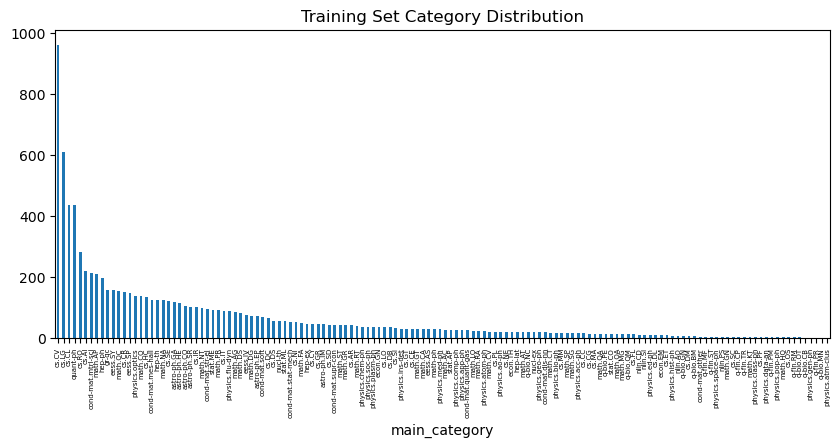

In [129]:
main_category_value_counts = train_df["main_category"].value_counts()
plt.figure(figsize=(10, 4)) 
ax = main_category_value_counts.plot(kind="bar", title="Training Set Category Distribution")
ax.tick_params(axis='x', labelsize=5)
plt.savefig("train_category_distribution.png", dpi=300, bbox_inches='tight')
plt.show()


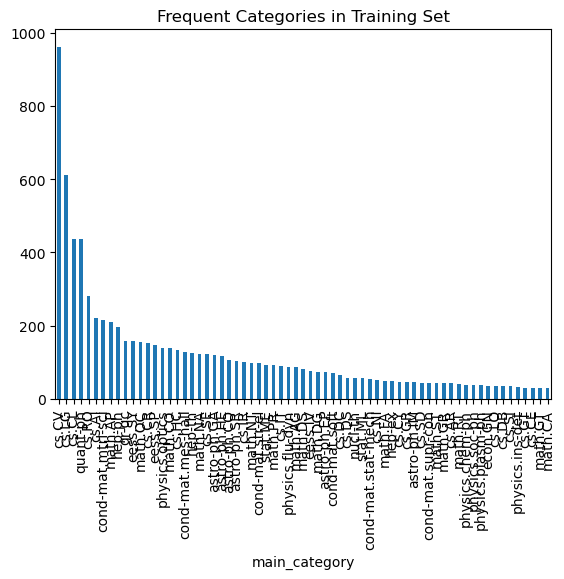

Number of frequent categories: 67
Number of instances with infrequent categories: 977, which is 10.80% of the training set.


In [170]:
threshold = 30

frequent_categories = main_category_value_counts[main_category_value_counts >= threshold]
frequent_categories.plot(kind="bar", title="Frequent Categories in Training Set")
plt.show()
print(f"Number of frequent categories: {len(frequent_categories)}")
print(f"Number of instances with infrequent categories: {len(train_df) - train_df['main_category'].isin(frequent_categories.index).sum()}, which is {100 * (len(train_df) - train_df['main_category'].isin(frequent_categories.index).sum()) / len(train_df):.2f}% of the training set.")

In [171]:
def extract_subject_if_rare(category):
    if category not in set(sub_list) or category in set(frequent_categories.index): #if it's already transformed or frequent, leave it as is
        return category
    else:
        return category.split('.')[0]

print(extract_subject_if_rare("cs.LG"))
print(extract_subject_if_rare("cs.DB"))
print(extract_subject_if_rare("econ.GN"))
print(extract_subject_if_rare("cs"))

cs.LG
cs.DB
econ.GN
cs


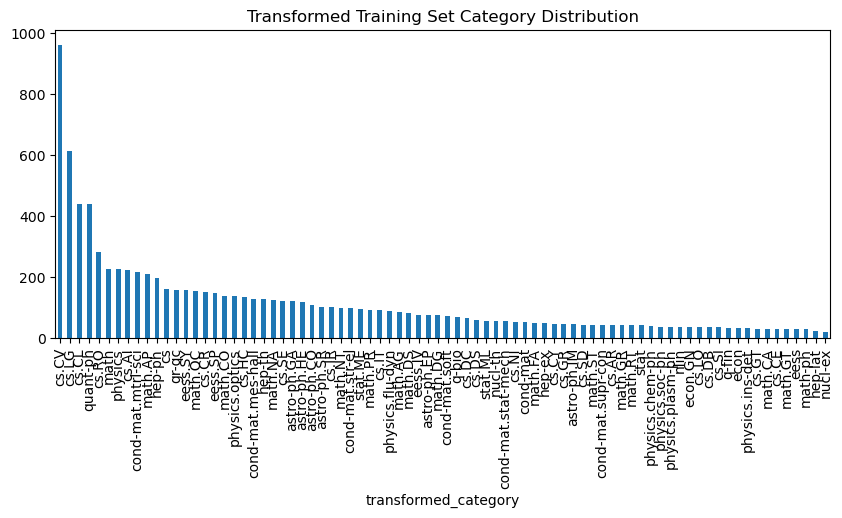

Number of frequent categories and subjects: 80


In [175]:
train_df["transformed_category"] = train_df["main_category"].apply(extract_subject_if_rare)
frequent_categories_transformed = train_df["transformed_category"].value_counts()
plt.figure(figsize=(10, 4)) 
frequent_categories_transformed.plot(kind="bar", title="Transformed Training Set Category Distribution")
plt.savefig("train_transformed_category_distribution.png", dpi=300, bbox_inches='tight')
plt.show()
print(f"Number of frequent categories and subjects: {len(frequent_categories_transformed)}")

In [181]:
train_df ["category_encoded"] = label_encoder.transform(train_df["transformed_category"])
train_df.head()

,main_category,categories,text,text_embedding,transformed_category,category_encoded
5786,astro-ph.HE,"astro-ph.HE,astro-ph.GA,astro-ph.IM",Evolution of the Comptonizing medium of the bl...,"[-0.30665530083944564, 1.966000192772947, -0.9...",astro-ph.HE,4
6338,math.DG,"math.DG,math.MG",On manifolds with almost non-negative Ricci cu...,"[0.12885817594024454, 1.821802999609177, -0.90...",math.DG,82
13687,stat.ME,stat.ME,A New Approach to the Nonparametric Behrens-Fi...,"[0.33175375434230864, 2.116911533907745, -0.85...",stat.ME,162
4611,hep-ph,"hep-ph,astro-ph.CO",Self-interacting dark matter with observable $...,"[0.0465500947820678, 2.0631494947871674, -1.39...",hep-ph,70
2060,cs.IT,"cs.IT,eess.SP,math.IT",Energy-Efficient SIM-assisted Communications: ...,"[0.40671088508181813, 2.2932791940112045, -1.2...",cs.IT,39


In [182]:
def cat_to_dict(main_category):
    return {
        "main_category": main_category,
        "categories": f"{main_category}"
    }
print(cat_to_dict("cs"))

{'main_category': 'cs', 'categories': 'cs'}


In [183]:
def error_function_single(pred1, pred2):
    return error_function.pred_vs_pred_error(cat_to_dict(pred1), cat_to_dict(pred2), a=0.5, b=1, c=1, d=0)

def custom_metric(y_true, y_pred):
    errors = [error_function_single(t, p) for t, p in zip(y_true, y_pred)]
    return np.mean(errors)

print(error_function_single("econ", "cs.CL"))
y_true = ["cs", "quant-ph", "quant-ph"]
y_pred = ["cs.CV", "quant-ph", "cs.CV"]
custom_metric(y_true, y_pred)

1


0.5

In [184]:
classes_in_train = np.unique(train_df["transformed_category"])
weights = compute_class_weight(class_weight='balanced', classes=classes_in_train, y= train_df["transformed_category"])
class_weights = dict(zip(classes_in_train, weights))
class_weights

{'astro-ph.CO': 1.0570093457943925,
 'astro-ph.EP': 1.5283783783783784,
 'astro-ph.GA': 0.9425,
 'astro-ph.HE': 0.9666666666666667,
 'astro-ph.IM': 2.458695652173913,
 'astro-ph.SR': 1.0980582524271845,
 'cond-mat': 2.175,
 'cond-mat.mes-hall': 0.8905511811023622,
 'cond-mat.mtrl-sci': 0.5260465116279069,
 'cond-mat.soft': 1.5929577464788733,
 'cond-mat.stat-mech': 2.0944444444444446,
 'cond-mat.str-el': 1.165979381443299,
 'cond-mat.supr-con': 2.5704545454545453,
 'cs': 0.7024844720496894,
 'cs.AI': 0.5094594594594595,
 'cs.AR': 2.630232558139535,
 'cs.CE': 3.77,
 'cs.CL': 0.2582191780821918,
 'cs.CR': 0.7440789473684211,
 'cs.CV': 0.11768990634755463,
 'cs.CY': 2.4063829787234043,
 'cs.DB': 3.1416666666666666,
 'cs.DC': 1.74,
 'cs.DS': 1.95,
 'cs.GR': 2.458695652173913,
 'cs.GT': 3.77,
 'cs.HC': 0.8440298507462687,
 'cs.IR': 1.1088235294117648,
 'cs.IT': 1.2428571428571429,
 'cs.LG': 0.18480392156862746,
 'cs.LO': 3.1416666666666666,
 'cs.NI': 2.1339622641509433,
 'cs.RO': 0.40106382

In [185]:
model = keras.Sequential(
    [
        layers.Input(shape=(1024,)),
        layers.Dense(512, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(len(sub_list), activation="softmax"),
    ]
)

In [186]:
model.compile(
    optimizer= optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy', 
    metrics=['sparse_categorical_accuracy']
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_129 (Dense)               │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_86 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_130 (Dense)               │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_87 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_131 (Dense)               │ (None, 166)            │        21,414 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 611,878 (2.33 MB)

 Trainable params: 611,878 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X = np.vstack(train_df["text_embedding"].values).astype('float32')
X_test = np.vstack(test_df["text_embedding"].values).astype('float32')

In [188]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=3,           
    restore_best_weights=True  
)

In [189]:
history = model.fit(X, train_df["category_encoded"], batch_size=64, epochs=100, validation_split=0.2, callbacks=[early_stopping], class_weight=class_weights)

Epoch 1/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4.7858 - sparse_categorical_accuracy: 0.0693 - val_loss: 4.0293 - val_sparse_categorical_accuracy: 0.1359
Epoch 2/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.0783 - sparse_categorical_accuracy: 0.1426 - val_loss: 3.5991 - val_sparse_categorical_accuracy: 0.1768
Epoch 3/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.7344 - sparse_categorical_accuracy: 0.1722 - val_loss: 3.3489 - val_sparse_categorical_accuracy: 0.2287
Epoch 4/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.4878 - sparse_categorical_accuracy: 0.1945 - val_loss: 3.1443 - val_sparse_categorical_accuracy: 0.2481
Epoch 5/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.2814 - sparse_categorical_accuracy: 0.2287 - val_loss: 3.0030 - val_sparse_categorical_accuracy: 0.2580
Epoch 6/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.1441 - sparse_categorical_accuracy: 0.2467 - val_loss: 2.8477 - val_sparse_categorical_accuracy: 0.307

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
predicted_classes: [96  3  4 ... 41 66 25]
predicted_categories: ['math.NT' 'astro-ph.GA' 'astro-ph.HE' ... 'cs.LO' 'eess.SY' 'cs.CV']


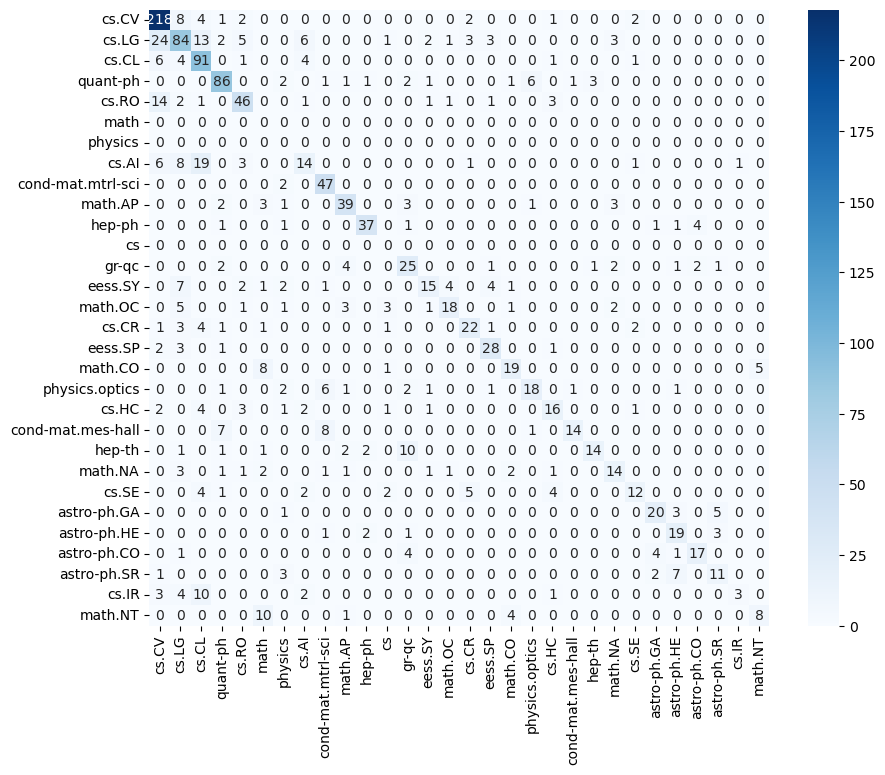

In [191]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
print("predicted_classes:", predicted_classes)
predicted_categories = label_encoder.inverse_transform(predicted_classes)
print("predicted_categories:", predicted_categories)
labels =frequent_categories_transformed.index.to_list()[:30]
conf_matrix = confusion_matrix(test_df["main_category"], predicted_categories, labels=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight') 
plt.show()

In [204]:
custom_metric(test_df["main_category"], predicted_categories)

0.3587533156498674

In [69]:
test_df["category_encoded"] = label_encoder.transform(test_df["main_category"])

In [81]:
model.evaluate(X_test, test_df["category_encoded"], verbose=1)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6985 - sparse_categorical_accuracy: 0.4957


[3.578275680541992, 0.4964632987976074]

In [105]:
accuracy = []
custom_metrics = []
thresholds = list(range(0, 101, 5))
for threshold in thresholds:

    main_category_value_counts = train_df["main_category"].value_counts()
    frequent_categories = main_category_value_counts[main_category_value_counts >= threshold]

    def extract_subject_if_rare(category):
        if category not in set(sub_list) or category in set(frequent_categories.index): #if it's already transformed or frequent, leave it as is
            return category
        else:
            return category.split('.')[0]

    train_df["transformed_category"] = train_df["main_category"].apply(extract_subject_if_rare)

    classes_in_train = np.unique(train_df["transformed_category"])
    weights = compute_class_weight(class_weight='balanced', classes=classes_in_train, y= train_df["transformed_category"])
    class_weights = dict(zip(classes_in_train, weights))

    model = keras.Sequential(
        [
            layers.Input(shape=(1024,)),
            layers.Dense(512, activation="relu"),
            layers.Dropout(0.3),
            layers.Dense(128, activation="relu"),
            layers.Dropout(0.3),
            layers.Dense(len(sub_list), activation="softmax"),
        ], name=f"model_{threshold}_threshold"
    )

    model.compile(
        optimizer= optimizers.Adam(learning_rate=1e-4),
        loss='sparse_categorical_crossentropy', 
        metrics=['sparse_categorical_accuracy']
    )

    history = model.fit(X, train_df["category_encoded"], batch_size=64, epochs=100, validation_split=0.2, callbacks=[early_stopping], class_weight=class_weights, verbose=0)

    print(f"Model with threshold {threshold} trained with {len(history.history['loss'])} epochs.")
    results=model.evaluate(X_test, test_df["category_encoded"], verbose=0)
    print(results)


    predicted_categories = label_encoder.inverse_transform(np.argmax(model.predict(X_test), axis=1))
    print(f"The custom metric for threshold {threshold} is: {custom_metric(test_df['main_category'], predicted_categories)}")
    model.save(f"models/model_{threshold}_threshold.keras")
    accuracy.append(results[1])
    custom_metrics.append(custom_metric(test_df["main_category"], predicted_categories))

Model with threshold 0 trained with 54 epochs.
[3.604254961013794, 0.4672855734825134]
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
The custom metric for threshold 0 is: 0.3706896551724138
Model with threshold 5 trained with 59 epochs.
[3.631216049194336, 0.47833776473999023]
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
The custom metric for threshold 5 is: 0.36693191865605657
Model with threshold 10 trained with 58 epochs.
[3.4723317623138428, 0.4761273264884949]
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
The custom metric for threshold 10 is: 0.36582670203359857
Model with threshold 15 trained with 59 epochs.
[3.5747501850128174, 0.4756852388381958]
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
The custom metric for threshold 15 is: 0.36847922192749777
Model with threshold 20 trained with 54 epochs.
[3.445960283279419, 0.4805481731891632]
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step
The custom metric for threshold 20 is: 0.36383731211317416
Model with threshold 25 trained with 60 epochs.
[3.582590103149414

In [160]:
correct_subject_percentage = 2 * (np.ones(len(accuracy)) - np.array(accuracy) - np.array(custom_metrics)) + np.array(accuracy)

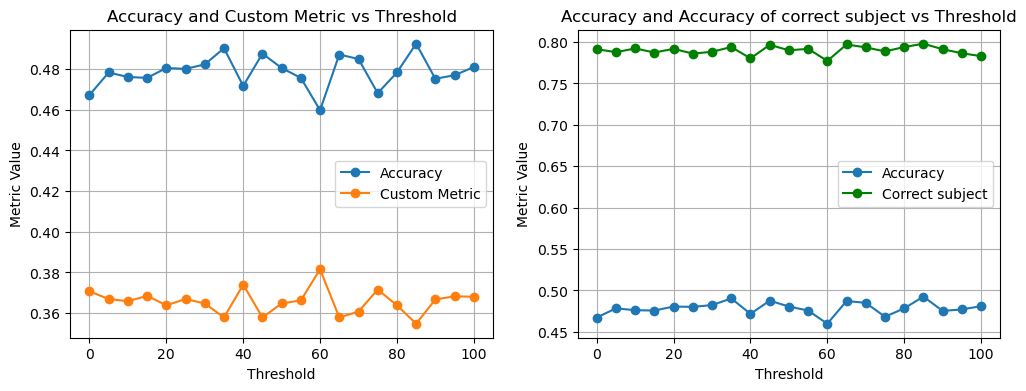

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4)) 

ax1.plot(thresholds, accuracy, label='Accuracy', marker='o')
ax1.plot(thresholds, custom_metrics, label='Custom Metric', marker='o')

ax1.set_xlabel('Threshold')
ax1.set_ylabel('Metric Value')
ax1.set_title('Accuracy and Custom Metric vs Threshold')
ax1.legend()
ax1.grid(True)


ax2.plot(thresholds, accuracy, label='Accuracy', marker='o')
ax2.plot(thresholds, correct_subject_percentage, label='Correct subject', marker='o', color = 'green')

ax2.set_xlabel('Threshold')
ax2.set_ylabel('Metric Value')
ax2.set_title('Accuracy and Accuracy of correct subject vs Threshold')
ax2.legend()
ax2.grid(True)

plt.show()

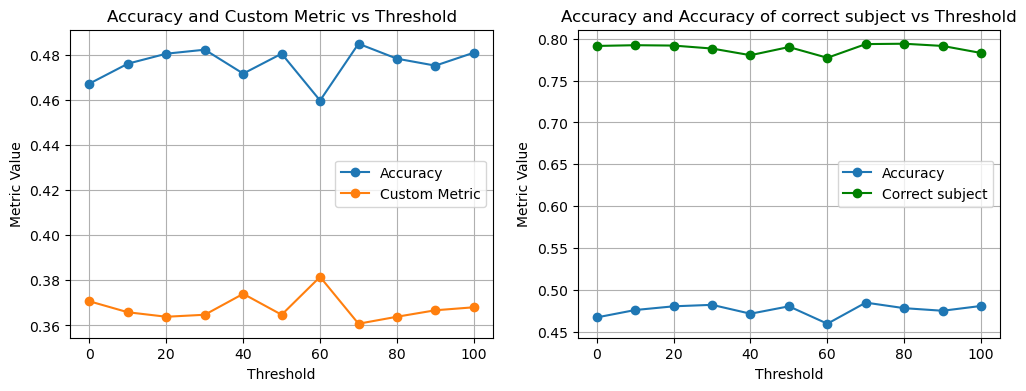

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4)) 

ax1.plot(thresholds[::2], accuracy[::2], label='Accuracy', marker='o')
ax1.plot(thresholds[::2], custom_metrics[::2], label='Custom Loss', marker='o')

ax1.set_xlabel('Threshold')
ax1.set_ylabel('Metric Value')
ax1.set_title('Accuracy and Custom Metric vs Threshold')
ax1.legend()
ax1.grid(True)


ax2.plot(thresholds[::2], accuracy[::2], label='Accuracy', marker='o')
ax2.plot(thresholds[::2], correct_subject_percentage[::2], label='Correct subject', marker='o', color = 'green')

ax2.set_xlabel('Threshold')
ax2.set_ylabel('Metric Value')
ax2.set_title('Accuracy and Accuracy of correct subject vs Threshold')
ax2.legend()
ax2.grid(True)

plt.savefig("threshold_analysis.png", dpi=300, bbox_inches='tight')
plt.show()


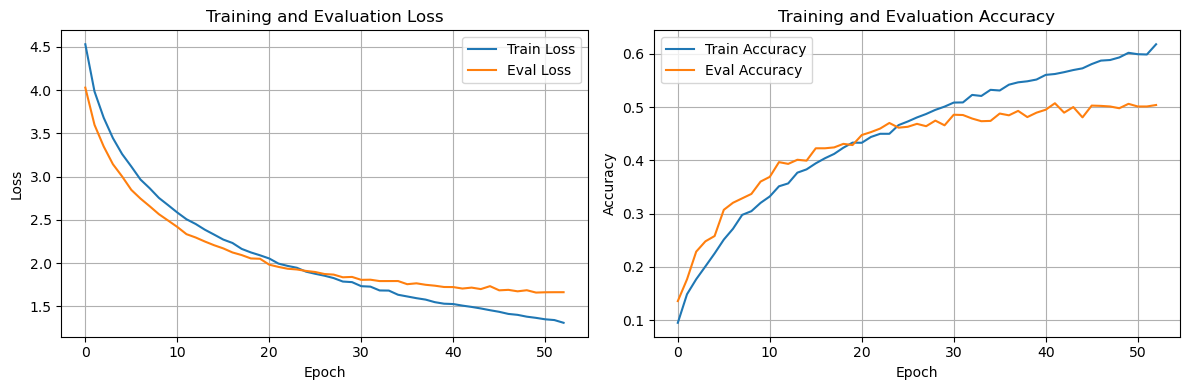

In [203]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4)) 

ax1.plot(history.history['loss'], label='Train Loss')
ax1.plot(history.history['val_loss'], label='Eval Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Evaluation Loss')
ax1.legend()
ax1.grid(True)

ax2.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy')
ax2.plot(history.history['val_sparse_categorical_accuracy'], label='Eval Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Evaluation Accuracy')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.savefig("training_evaluation_loss_accuracy.png", dpi=300, bbox_inches='tight')
plt.show()
